<a href="https://colab.research.google.com/github/A-J-10/Integrated-Disease-Prediction-Platform/blob/main/DiabPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df2=pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
for col in df2.columns:
  unique_values = df2[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'gender': ['Female' 'Male' 'Other']
Unique values for column 'age': [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Unique values for column 'hypertension': [0 1]
Unique values for column 'heart_disease': [1 0]
Unique values for column 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Unique values for column 'bmi': [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Unique values for colu

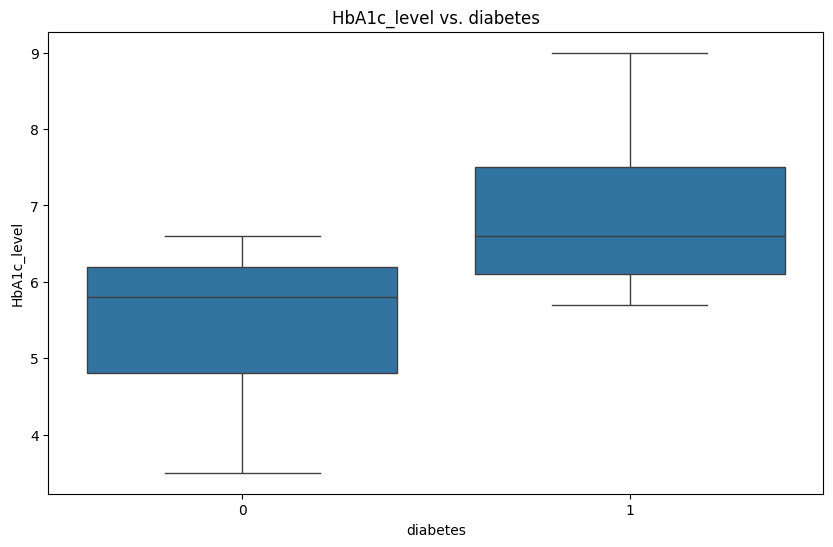

In [5]:
import matplotlib.pyplot as plt

# Choose a continuous column and a categorical column
continuous_column = "HbA1c_level"
categorical_column = "diabetes"

# Create a boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x=categorical_column, y=continuous_column, data=df2)
plt.xlabel(categorical_column)
plt.ylabel(continuous_column)
plt.title(f"{continuous_column} vs. {categorical_column}")
plt.show()


In [6]:
import statsmodels.api as sm

# Define the model formula
formula = "diabetes ~ " + "+".join(df2.drop("diabetes", axis=1).columns)

# Fit the logistic regression model
model = sm.formula.glm(formula, family=sm.families.Binomial(), data=df2).fit()

# Print the model summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99986
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11314.
Date:                Wed, 04 Sep 2024   Deviance:                       22627.
Time:                        10:21:56   Pearson chi2:                 6.44e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2991
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [7]:
accuracy = model.predict(df2.drop("diabetes", axis=1)).round().astype(int) == df2["diabetes"]
accuracy = accuracy.value_counts(normalize=True)[True] * 100
print(f"Accuracy of the logistic regression model: {accuracy:.2f}%")


Accuracy of the logistic regression model: 96.03%


<Axes: xlabel='gender', ylabel='count'>

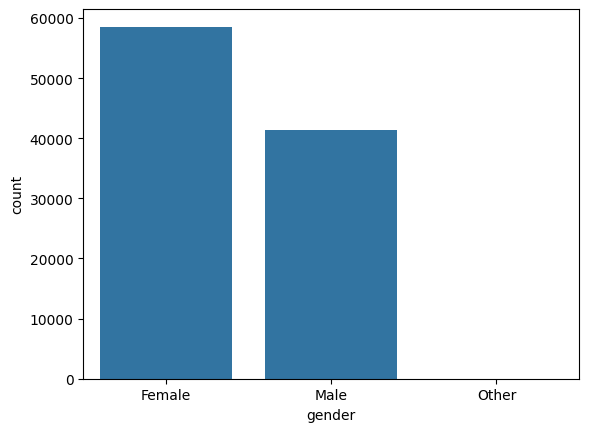

In [8]:
sb.countplot(x=df2['gender'])

<Axes: xlabel='age', ylabel='Count'>

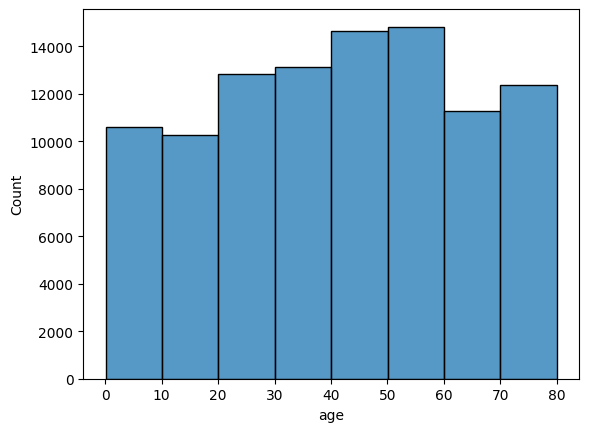

In [9]:
sb.histplot(x=df2['age'], bins=8)

Text(0.5, 0, 'Hypertension')

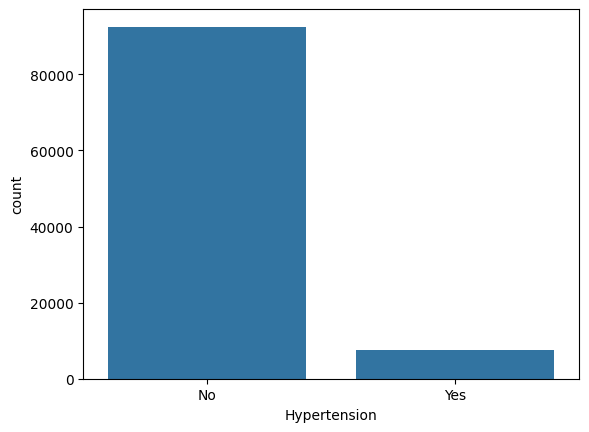

In [10]:
sb.countplot(x=df2['hypertension'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Hypertension')

Text(0.5, 0, 'Heart Disease')

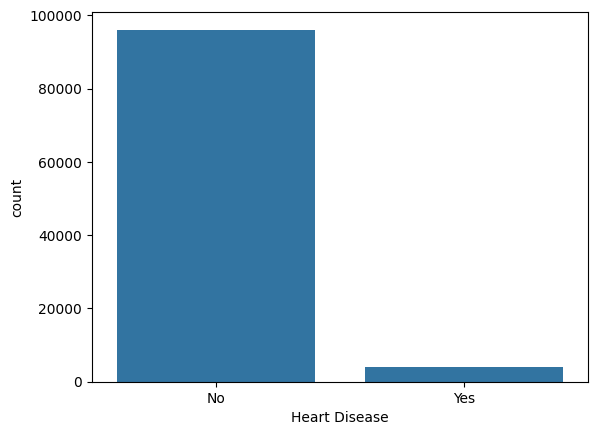

In [11]:
sb.countplot(x=df2['heart_disease'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Heart Disease')

Text(0.5, 0, 'Smoking History')

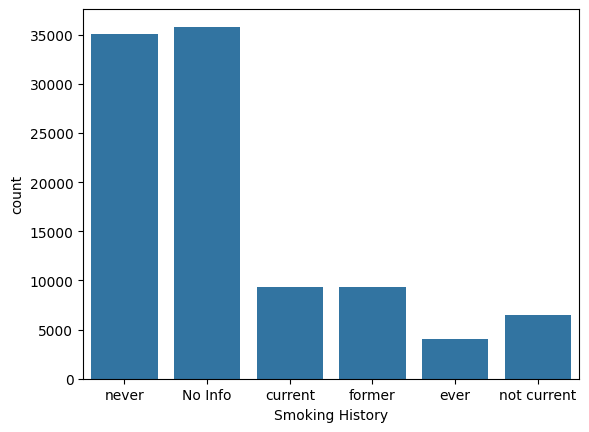

In [12]:
sb.countplot(x=df2['smoking_history'])
plt.xlabel('Smoking History')

Text(0.5, 0, 'BMI')

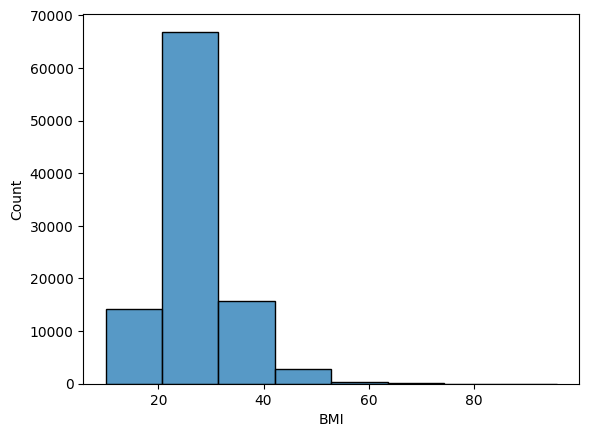

In [13]:
sb.histplot(x=df2['bmi'], bins=8)
plt.xlabel('BMI')

Text(0.5, 0, 'HbA1c Level')

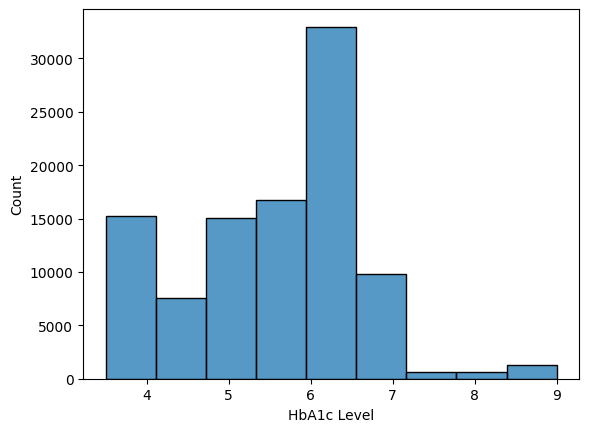

In [14]:
sb.histplot(x=df2['HbA1c_level'], bins=9)
plt.xlabel('HbA1c Level')

Text(0.5, 0, 'Blood Glucose Level')

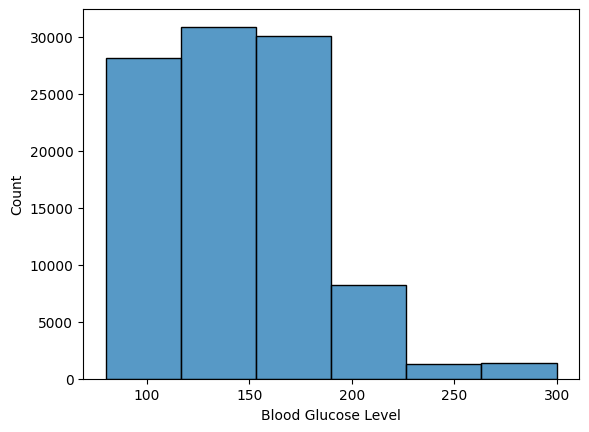

In [15]:
sb.histplot(x=df2['blood_glucose_level'], bins=6)
plt.xlabel('Blood Glucose Level')

Text(0.5, 0, 'Diabetes')

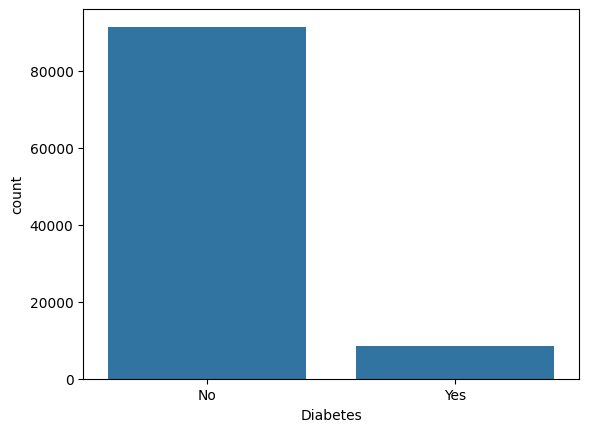

In [16]:
sb.countplot(x=df2['diabetes'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')

Text(0.5, 0, 'Diabetes')

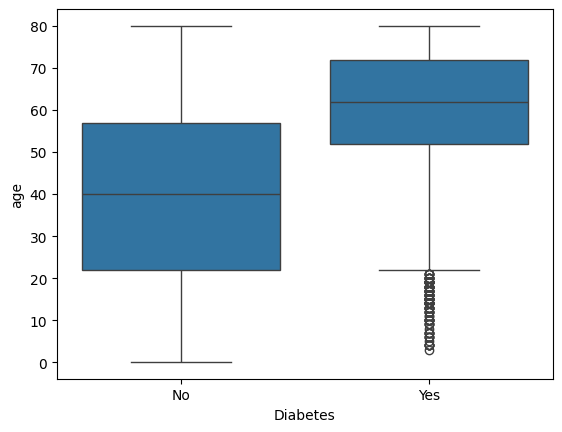

In [17]:
sb.boxplot(x=df2['diabetes'], y=df2['age'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')

<Axes: xlabel='age', ylabel='bmi'>

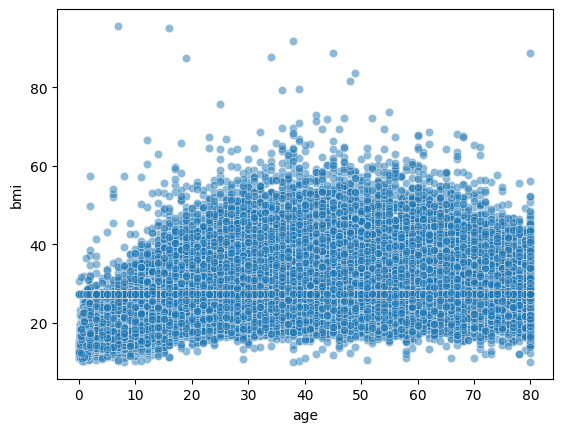

In [18]:
sb.scatterplot(x=df2['age'], y=df2['bmi'], alpha=0.5)

<ipython-input-19-075f98a69ca4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df2['hypertension'], y=df2['age'], palette='viridis')


Text(0.5, 0, 'Hypertension')

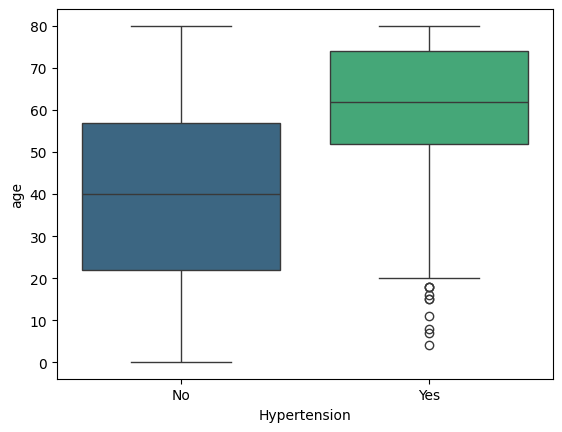

In [19]:
sb.boxplot(x=df2['hypertension'], y=df2['age'], palette='viridis')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Hypertension')

<ipython-input-20-47e842604145>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x=df2['smoking_history'], y=df2['hypertension'], hue=df2['gender'], palette='viridis', ci=None)


<Axes: xlabel='smoking_history', ylabel='hypertension'>

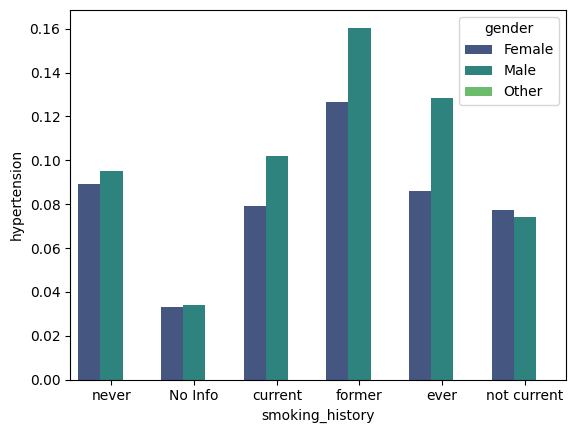

In [20]:
sb.barplot(x=df2['smoking_history'], y=df2['hypertension'], hue=df2['gender'], palette='viridis', ci=None)

In [21]:
import seaborn as sns

<ipython-input-22-43b61bd4b364>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df2['smoking_history'], y=df2['heart_disease'], hue=df2['gender'], palette='viridis', ci=None)


<Axes: xlabel='smoking_history', ylabel='heart_disease'>

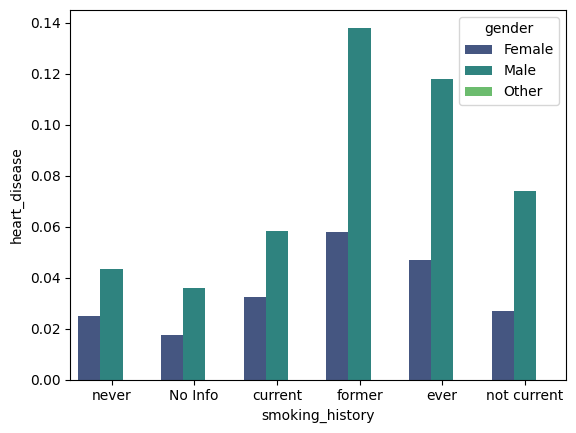

In [22]:
sns.barplot(x=df2['smoking_history'], y=df2['heart_disease'], hue=df2['gender'], palette='viridis', ci=None)

<ipython-input-23-fdbada0345e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['smoking_history'], y=df2['blood_glucose_level'], palette='viridis')


<Axes: xlabel='smoking_history', ylabel='blood_glucose_level'>

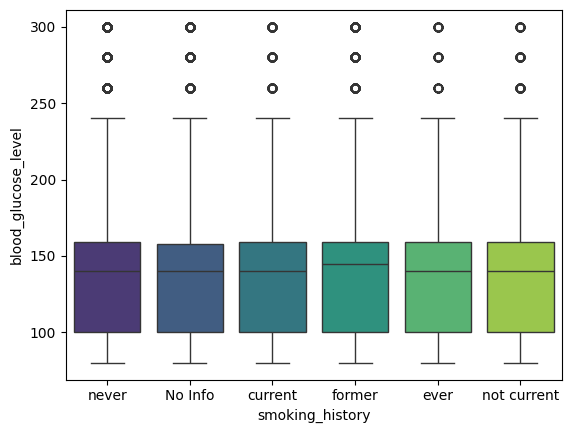

In [23]:
sns.boxplot(x=df2['smoking_history'], y=df2['blood_glucose_level'], palette='viridis')


<ipython-input-24-427e532125f5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['smoking_history'], y=df2['HbA1c_level'], palette='viridis')


<Axes: xlabel='smoking_history', ylabel='HbA1c_level'>

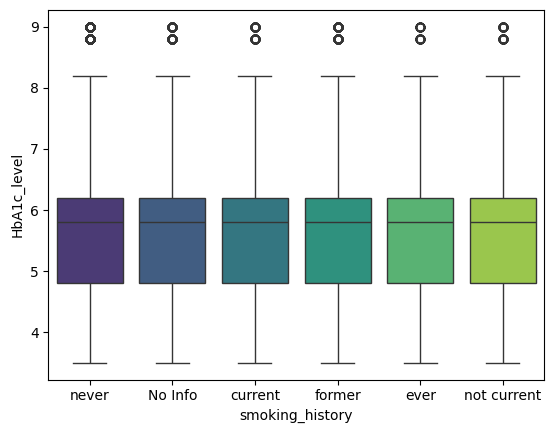

In [24]:
sns.boxplot(x=df2['smoking_history'], y=df2['HbA1c_level'], palette='viridis')


<ipython-input-25-87f818e96d37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['smoking_history'], y=df2['age'], palette='coolwarm')


<Axes: xlabel='smoking_history', ylabel='age'>

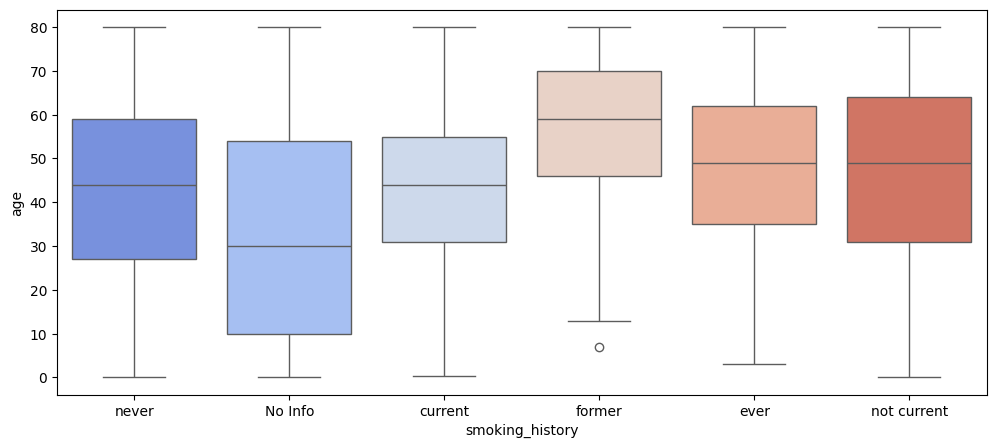

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df2['smoking_history'], y=df2['age'], palette='coolwarm')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


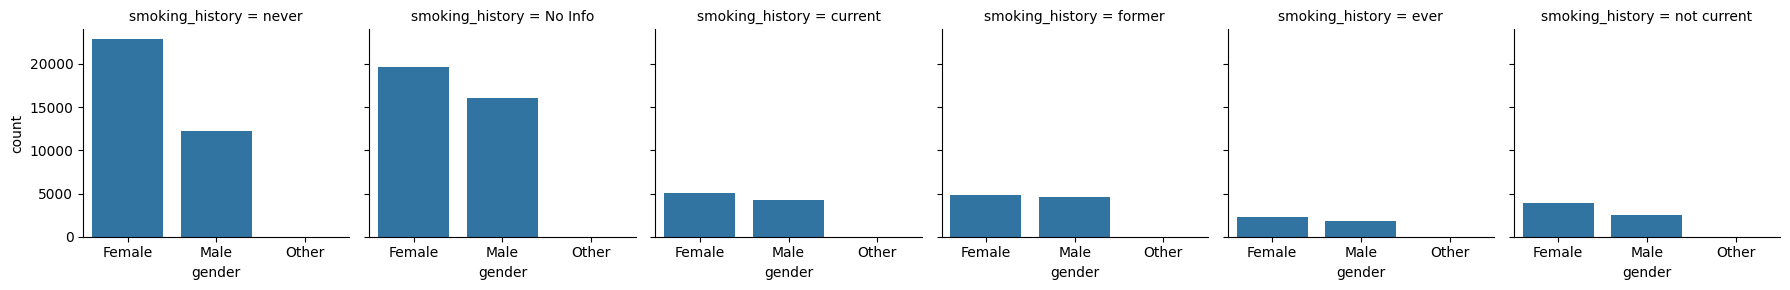

In [26]:
g =sns.FacetGrid(df2, col="smoking_history")
g.map(sns.countplot, "gender")

<Axes: >

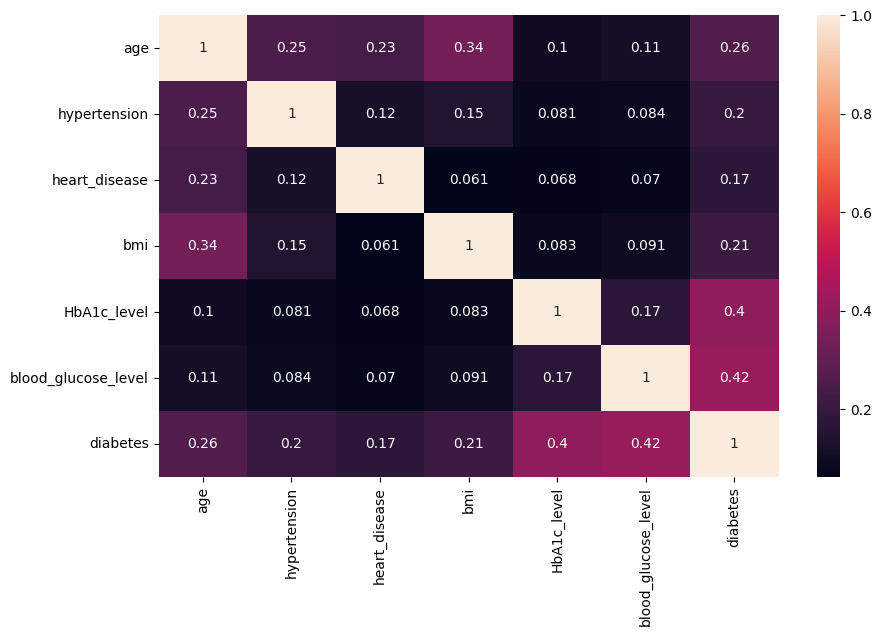

In [27]:
numerical_df = df2.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True)

In [28]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, r2_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [29]:
le = LabelEncoder()

df2['gender'] = le.fit_transform(df2['gender'])
df2['smoking_history'] = le.fit_transform(df2['smoking_history'])

df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [30]:
X = df2.drop('diabetes', axis=1)
y = df2['diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.3)


In [32]:
rcf= RandomForestClassifier(n_estimators=1600)
rcf.fit(X_train, y_train)
rcf_pred = rcf.predict(X_test)
print(r2_score(y_test, rcf_pred))
print('\n')
print(confusion_matrix(y_test, rcf_pred))
print('\n')
print(classification_report(y_test, rcf_pred))
rcf_pred_proba = rcf.predict_proba(X_test)

print(roc_auc_score(y_test, rcf_pred_proba[:,1]))

0.6216309282832746


[[27282    94]
 [  812  1812]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27376
           1       0.95      0.69      0.80      2624

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

0.9701984171309925


In [33]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' are the true labels and 'rcf_pred' are the predicted labels
accuracy = accuracy_score(y_test, rcf_pred)
print(f"Accuracy of the RandomForestClassifier: {accuracy * 100:.2f}%")

Accuracy of the RandomForestClassifier: 96.98%


In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=5)


In [35]:
x_bal, y_bal = sm.fit_resample(X, y)
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(x_bal, y_bal, test_size=0.3, random_state=42)
rcf_b = RandomForestClassifier(n_estimators=100)

rcf_b.fit(X_bal_train, y_bal_train)

rcf_b_pred = rcf_b.predict(X_bal_test)
print(r2_score(y_bal_test, rcf_b_pred))
print('\n')
print(confusion_matrix(y_bal_test, rcf_b_pred))
print('\n')
print(classification_report(y_bal_test, rcf_b_pred))
rcf_b_pred_proba = rcf_b.predict_proba(X_bal_test)

print(roc_auc_score(y_bal_test, rcf_b_pred_proba[:,1]))


0.8946438913720542


[[26671   698]
 [  748 26783]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27369
           1       0.97      0.97      0.97     27531

    accuracy                           0.97     54900
   macro avg       0.97      0.97      0.97     54900
weighted avg       0.97      0.97      0.97     54900

0.996948124892283


In [36]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' are the true labels and 'rcf_pred' are the predicted labels
accuracy = accuracy_score(y_bal_test, rcf_b_pred)
print(f"Accuracy of the RandomForestClassifier: {accuracy * 100:.2f}%")


Accuracy of the RandomForestClassifier: 97.37%
